https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset/data

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:
# Loading the Dataset
data = pd.read_csv('laptops.csv')
data.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


# EDA:

In [3]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

The dataset consists of 991 entries and 22 columns, representing various attributes of laptops. Key columns include 'Brand', 'Model', 'Price', 'Rating', and specifications such as processor details, RAM, storage capacity, GPU information, display features, operating system, and warranty year. 

In [4]:
data.select_dtypes(include=['object']).nunique()

brand                      26
Model                     991
processor_brand             4
processor_tier             15
primary_storage_type        2
secondary_storage_type      2
gpu_brand                   5
gpu_type                    3
OS                          7
year_of_warranty            4
dtype: int64

In [5]:
# Checking for duplicates
print("Number of duplicated data:", data.duplicated().sum())

Number of duplicated data: 0


In [6]:
# Checking for missing values
data.isnull().sum()

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

No missing value found!

In [7]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
    print("Descriptive Analysis:")
    print(data.describe())

# Example usage:
explore_data(data)

Major Moments:
                                    Mean   Median  Standard Deviation  \
index                         505.860747    507.0          287.899458   
Price                       77266.504541  61900.0        57384.910269   
Rating                         63.931382     64.0           10.190575   
num_cores                       8.128153      8.0            4.215499   
num_threads                    12.191726     12.0            5.585115   
ram_memory                     13.047427     16.0            5.591188   
primary_storage_capacity      610.938446    512.0          266.927666   
secondary_storage_capacity      4.004036      0.0           33.553936   
is_touch_screen                 0.088799      0.0            0.284597   
display_size                   15.171241     15.6            0.938089   
resolution_width             2003.503532   1920.0          361.965292   
resolution_height            1181.227043   1080.0          263.884019   

                            Skewnes

One major insight from the descriptive analysis is the wide range of laptop prices, with a mean price of approximately $77,266 and a standard deviation of around $57,384. This indicates significant variability in laptop prices within the dataset, suggesting the presence of various laptop brands and models catering to different price segments. Additionally, the analysis reveals that most laptops have a primary storage capacity of around 512 GB, but there is considerable variability in other specifications such as RAM memory, display size, and resolution. This suggests that consumers have a diverse range of options to choose from based on their specific requirements and preferences.







In [8]:
brand_price = data.groupby('brand')['Price'].mean().sort_values(ascending=False)
brand_price

brand
apple        193875.333333
lg           115284.714286
dell         101701.132075
msi           94260.433333
microsoft     88740.000000
fujitsu       82890.800000
gigabyte      80990.000000
asus          78290.223810
hp            76005.604878
samsung       67990.000000
lenovo        65527.562189
acer          62847.876404
honor         49490.000000
realme        39990.000000
zebronics     39132.857143
infinix       38220.769231
tecno         29990.000000
wings         29990.000000
chuwi         28740.000000
avita         25461.800000
ultimus       17060.500000
axl           16490.000000
walker        15990.000000
jio           14701.000000
primebook     13990.000000
iball          9800.000000
Name: Price, dtype: float64

In [9]:
resolution= data.groupby('display_size')[['resolution_width', 'resolution_height']].mean()
resolution 

,resolution_width,resolution_height
display_size,,
10.1,1200.000000,800.000000
11.6,1366.000000,768.000000
12.4,1536.000000,1024.000000
13.0,1920.000000,1080.000000
13.3,2303.578947,1499.789474
13.4,2285.714286,1428.571429
13.5,2851.200000,1900.800000
13.6,2560.000000,1664.000000
14.0,1987.991561,1203.274262


In [10]:
data.drop(columns=['index'], inplace=True)

In [11]:
data.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,SSD,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,SSD,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,SSD,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,SSD,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,SSD,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


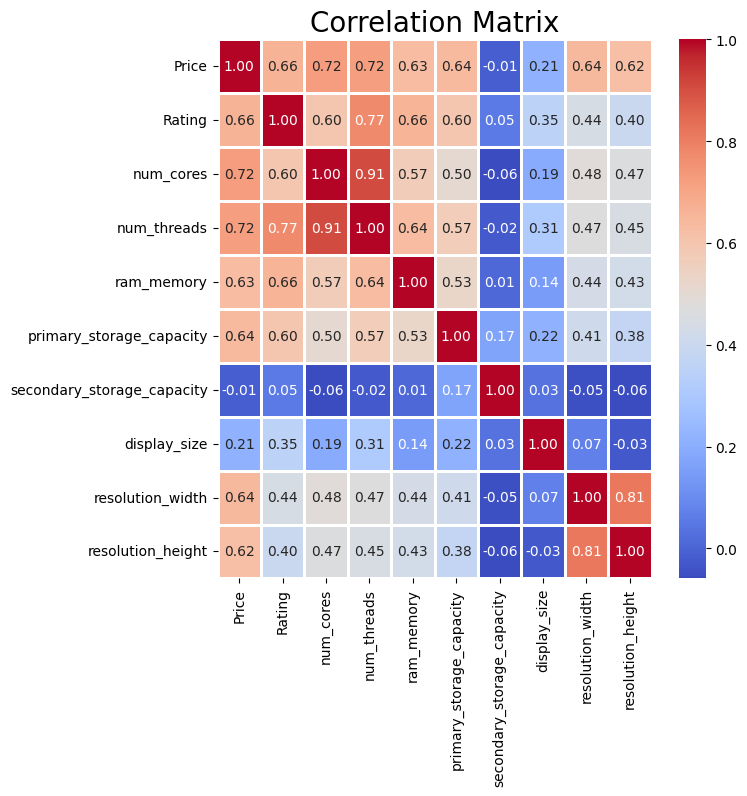

In [12]:
def plot_correlation_matrix(data):
    """
    Plot a correlation matrix heatmap for numerical features in the dataset.

    Parameters:
    - data (DataFrame): Input dataset.

    Returns:
    - None
    """
    numerical_features = data.select_dtypes(include=[np.number]).columns
    corr_matrix = data[numerical_features].corr()

    plt.figure(figsize=(7, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix', fontsize=20)
    plt.show()

plot_correlation_matrix(data)

It reveals strong positive correlations between Price and Rating, suggesting that higher-priced laptops tend to receive higher ratings, as well as between Price and primary_storage_capacity, indicating that laptops with larger primary storage capacities tend to be more expensive. Additionally, there are strong positive correlations between num_cores and num_threads, indicating that laptops with more CPU cores also tend to have more threads. Moderate positive correlations are observed between Rating and num_threads, num_cores and resolution_width, and resolution_width and resolution_height. However, some features, such as secondary_storage_capacity, display_size, and resolution_height, exhibit weak correlations with other features, suggesting they may not significantly influence each other. 

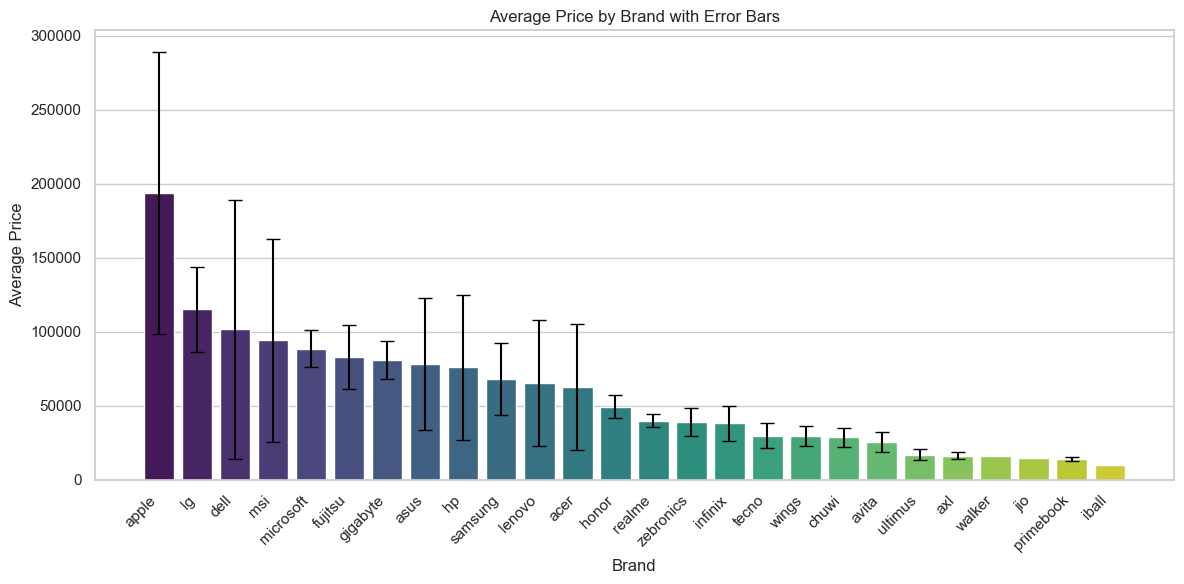

In [13]:
def plot_brand_price(data):
    """
    Plot the average price by brand with error bars.

    Parameters:
        data (DataFrame): Input dataset containing brand and price information.
    """
    sns.set(style="whitegrid")
    brand_stats = data.groupby('brand')['Price'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
    sns.color_palette('viridis', n_colors=len(brand_stats))
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=brand_stats.index, y='mean', data=brand_stats, palette='viridis')
    ax.errorbar(x=brand_stats.index, y=brand_stats['mean'], yerr=brand_stats['std'], fmt='none', color='black', capsize=5)
    plt.title('Average Price by Brand with Error Bars')
    plt.xlabel('Brand')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_brand_price(data)

The analysis reveals distinct pricing patterns among laptop brands, with Apple commanding the highest average prices, followed by LG and Dell. On the contrary, Primebook and iBall laptops are observed to have the lowest average prices among the brands considered. This insight suggests that consumers seeking premium quality and features may gravitate towards Apple, LG, or Dell laptops, while those with budget constraints may find Primebook and iBall offerings more affordable and accessible. 

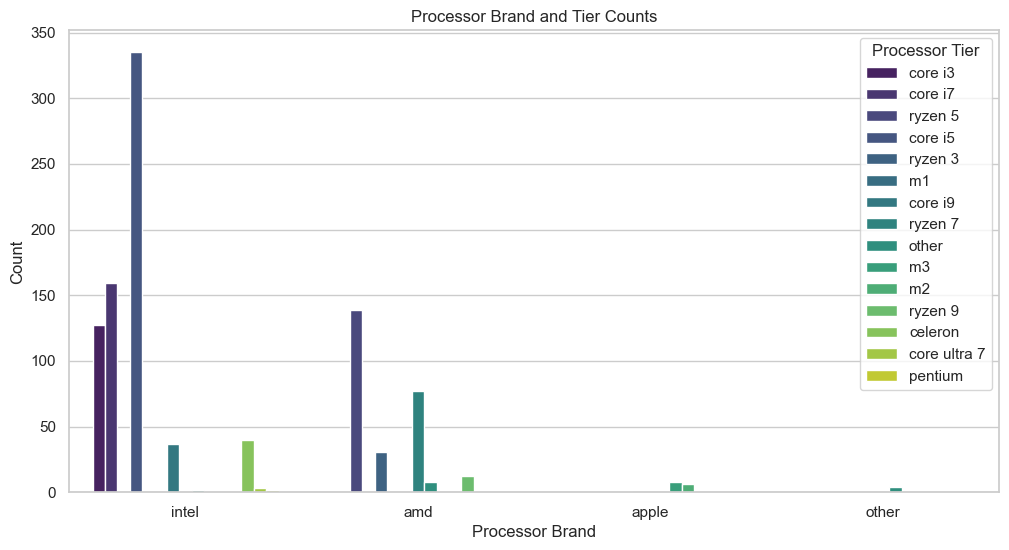

In [14]:
def plot_processor_counts(data):
    """
    Plot the count of processor brands and tiers.

    Parameters:
        data (DataFrame): Input dataset containing processor brand and tier information.

    Returns:
        None
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(x='processor_brand', hue='processor_tier', data=data, palette='viridis')
    plt.title('Processor Brand and Tier Counts')
    plt.xlabel('Processor Brand')
    plt.ylabel('Count')
    plt.legend(title='Processor Tier', bbox_to_anchor=(1, 1))
    plt.show()

plot_processor_counts(data)

The plot illustrates the distribution of processor brands and tiers within the dataset. It appears that Intel processors dominate across various tiers, followed by AMD and Qualcomm. Within each brand, the majority of processors belong to the mid-tier category, indicating a balanced distribution across different performance levels. This insight suggests that Intel is the preferred choice for laptops in this dataset, offering a range of performance options catering to diverse user needs.

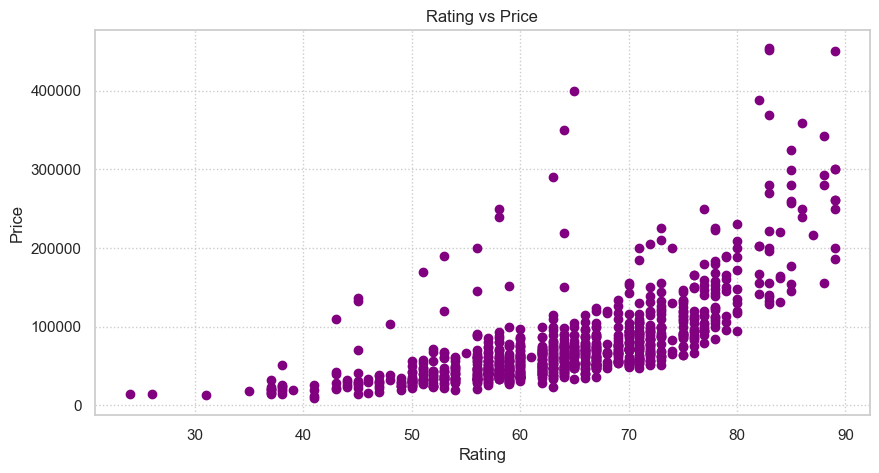

In [15]:
def plot_rating_vs_price(data):
    """
    Plot a scatter plot of Rating vs Price.

    Parameters:
        data (DataFrame): Input dataset containing 'Rating' and 'Price' columns.
    """
    plt.figure(figsize=(10, 5))
    plt.scatter(data['Rating'], data['Price'], color='purple')

    plt.title('Rating vs Price')
    plt.xlabel('Rating')
    plt.ylabel('Price')

    plt.grid(axis='y', linestyle='dotted')
    plt.grid(axis='x', linestyle='dotted')

    plt.show()

plot_rating_vs_price(data)

The scatter plot of Rating vs Price indicates a slight positive correlation between the two variables. Generally, higher-rated laptops tend to have higher prices, as seen by the trend of prices increasing with higher ratings. However, there are also instances of lower-priced laptops with relatively high ratings, suggesting that factors other than rating alone contribute to the pricing of laptops. The plot also shows some dispersion in the data, indicating that while rating may influence price to some extent, there are other factors at play in determining the pricing of laptops.

## Linear Regression:

In [16]:
df = data

In [17]:
# Removing unneccessary columns
df = df.drop(['brand', 'Model', 'processor_brand', 'processor_tier', 'primary_storage_type', 'secondary_storage_type', 'gpu_brand', 'gpu_type', 'OS', 'year_of_warranty'], axis=1)

In [18]:
df = pd.get_dummies(df)

In [19]:
df.head()

,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height
0,23990,63,2,4,8,512,0,False,15.6,1920,1080
1,35990,67,4,8,16,1024,0,False,15.6,1920,1080
2,51100,73,6,12,8,512,0,False,15.6,1920,1080
3,39990,62,12,16,8,512,0,False,14.0,1920,1080
4,28580,62,4,8,8,512,0,False,15.6,1920,1080


In [20]:
# Splitting the data for training and testing
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
def linear_train(X_train, y_train):
    """
    Fit a Linear Regression model.

    Parameters:
    - X_train: The feature matrix for training.
    - y_train: The target values for training.

    Returns:
    - model: The fitted Linear Regression model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

lm = linear_train(X_train, y_train)

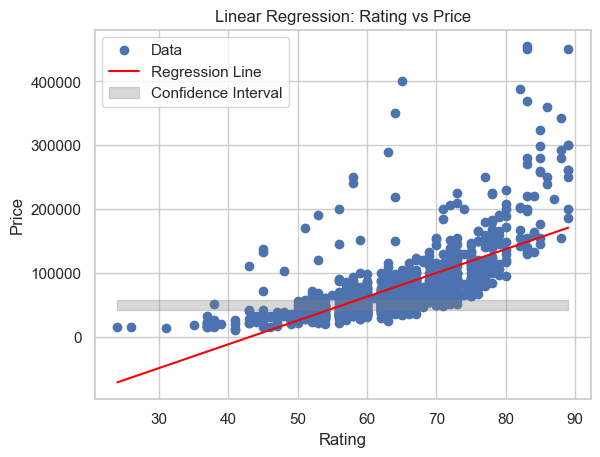

Root Mean Squared Error (RMSE): 43017.77


In [22]:
def plot_linear_regression(data, model, x_feature, y_feature):
    """
    Plot the Linear Regression line on a scatter plot.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features and target variable used for visualization.
        model: Trained Linear Regression model.
            The trained Linear Regression model to be visualized.
        x_feature (str): Name of the feature to use as input (independent variable).
            The name of the column in the dataset representing the independent variable.
        y_feature (str): Name of the feature to predict (dependent variable).
            The name of the column in the dataset representing the dependent variable.
    """
    # Scatter plot of the data
    plt.scatter(data[x_feature], data[y_feature], label='Data')
    
    # Predictions using the model
    x_values = np.linspace(data[x_feature].min(), data[x_feature].max(), 100)
    y_pred = model.predict(x_values.reshape(-1, 1))
    
    # Calculate confidence interval
    y_pred_mean = y_pred.mean()
    y_pred_std = np.sqrt(mean_squared_error(data[y_feature], model.predict(data[x_feature].values.reshape(-1, 1))))
    ci = norm.interval(0.95, loc=y_pred_mean, scale=y_pred_std / np.sqrt(len(y_pred)))
    
    # Plotting the regression line with confidence interval
    plt.plot(x_values, y_pred, color='red', label='Regression Line')
    plt.fill_between(x_values, ci[0], ci[1], color='gray', alpha=0.3, label='Confidence Interval')
    
    plt.title(f'Linear Regression: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.show()

    # Calculate and print RMSE
    y_true = data[y_feature]
    y_pred_train = model.predict(data[x_feature].values.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_train))
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Train the linear regression model using only the 'Rating' feature
X = df[['Rating']]  # Independent variable
y = df['Price']     # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Plot the linear regression line
plot_linear_regression(df, model, 'Rating', 'Price')


From the plot, it seems that there is a positive correlation between the 'Rating' and 'Price' features, indicating that higher ratings are associated with higher prices. However, the spread of the data points suggests some variability in this relationship, which the model attempts to capture with the regression line.

The RMSE value of 43017.77 indicates the average deviation of the observed values from the regression line. In this case, it suggests that, on average, the predicted prices deviate from the actual prices by approximately $43,017.77. 

## Clustering:

In [23]:
# selecting columns
numeric_columns = data.select_dtypes("number").columns
categorical_columns = data.select_dtypes(exclude=["number"]).columns

# transforming columns
ct = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_columns),
    ("encoder", OneHotEncoder(), categorical_columns)
])

# pipeline
pipeline = Pipeline([
    ("preprocessor", ct)
])

# transforming the data
df_new = pipeline.fit_transform(data)

In [24]:
df_new.shape


(991, 1071)

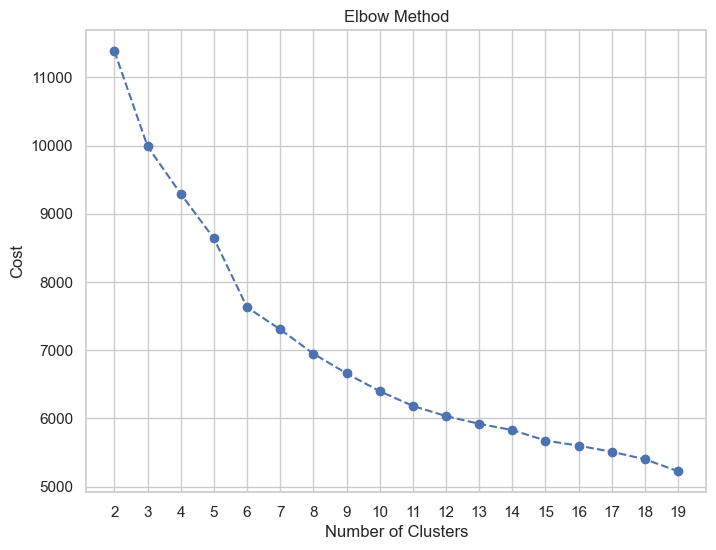

In [25]:
def plot_elbow_method(data, min_clusters=2, max_clusters=20, random_state=42):
    """
    Plot the Elbow Method graph for KMeans clustering.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset used for clustering.
        min_clusters (int): Minimum number of clusters to consider. Default is 2.
        max_clusters (int): Maximum number of clusters to consider. Default is 20.
        random_state (int): Random seed for reproducibility. Default is 2024.
    """
    cost = []
    for i in range(min_clusters, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=random_state)
        kmeans.fit_predict(data)
        cost.append(kmeans.inertia_)

    # Plotting the Elbow Method graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(min_clusters, max_clusters), cost, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost')
    plt.xticks(range(min_clusters, max_clusters))
    plt.grid(True)
    plt.show()
plot_elbow_method(df_new)


In this plot, the elbow point appears to be around 6 or 7 clusters, after which the decrease in cost becomes less pronounced. Therefore, 6 or 7 clusters may be considered as the optimal number for clustering the data.

In [26]:
def perform_kmeans_clustering(data, n_clusters=6, random_state=2024):
    """
    Perform KMeans clustering on the dataset and map cluster labels to segment names.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset used for clustering.
        n_clusters (int): Number of clusters to create. Default is 6.
        random_state (int): Random seed for reproducibility. Default is 2024.
    
    Returns:
        DataFrame: DataFrame with cluster labels and segmentation.
    """
    # data modeling
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans_model.fit_predict(data)
    data["clusters"] = clusters
    
    # mapping the clusters name
    data["segmentation"] = data["clusters"].map({
        0: "Cluster A",
        1: "Cluster B",
        2: "Cluster C",
        3: "Cluster D",
        4: "Cluster E",
        5: "Cluster F"
    })
    return data
    
# Convert the sparse matrix to a DataFrame
df_new_dense = df_new.toarray()

# Perform KMeans clustering on the DataFrame
result_df = perform_kmeans_clustering(pd.DataFrame(df_new_dense), n_clusters=6)


This function takes the result_df DataFrame as input, removes the "segmentation" column, applies PCA, creates a new DataFrame with PCA-transformed data, and finally groups the data by the "label" column. It returns the grouped DataFrame.







In [27]:
def apply_pca_and_grouping(result_df):
    """
    Apply PCA on the DataFrame and group by label.

    Parameters:
        result_df (DataFrame): DataFrame containing segmentation labels.

    Returns:
        DataFrameGroupBy: Grouped DataFrame by label.
    """
    # Remove the label column from the DataFrame before applying PCA
    features = result_df.drop(columns=["segmentation"])

    # Apply PCA on the DataFrame
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features.values)  # Convert DataFrame to numpy array

    # Create new DataFrame
    df = pd.DataFrame({
        "x": df_pca[:, 0], 
        "y": df_pca[:, 1], 
        "label": result_df["segmentation"]
    })
    
    # Grouping by label
    groups = df.groupby("label")
    
    return groups

groups = apply_pca_and_grouping(result_df)

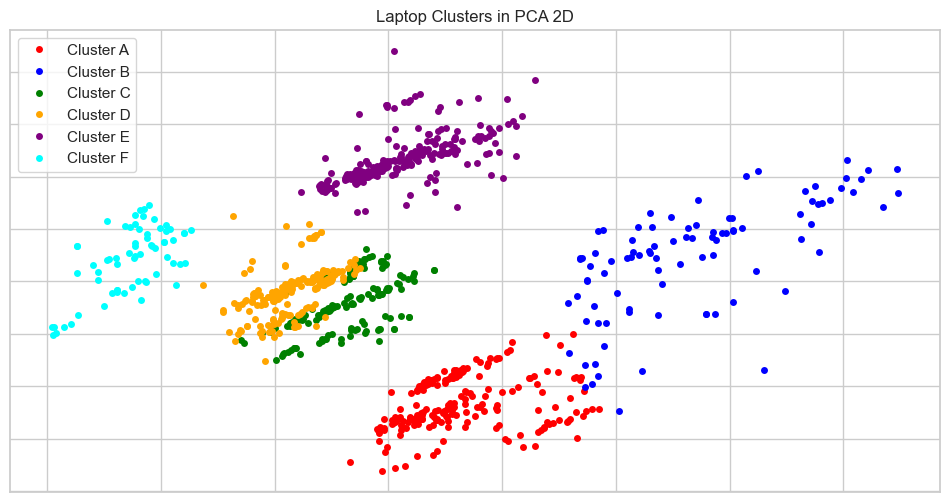

In [28]:
# color mapping for each cluster
colors = {
    "Cluster A": "red",
    "Cluster B": "blue",
    "Cluster C": "green",
    "Cluster D": "orange",
    "Cluster E": "purple",
    "Cluster F": "cyan",
}

def plot_cluster_groups(groups, colors):
    """
    Plot clustered groups with specified colors.

    Parameters:
        groups (DataFrameGroupBy): Grouped DataFrame by label.
        colors (dict): Dictionary mapping cluster labels to colors.

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name], label=name, mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    ax.legend()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("Laptop Clusters in PCA 2D")
    plt.show()

plot_cluster_groups(groups, colors)

The plot suggests that the laptop dataset can be effectively segmented into distinct clusters based on their features. Each cluster appears to exhibit a relatively cohesive grouping of data points, indicating similarity among laptops within the same cluster and differentiation from those in other clusters. The clear separation between clusters suggests that the chosen features successfully capture meaningful variations in the dataset.